In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [3]:
import torch

X = torch.arange(-3, 3, 0.1).view(-1,1)
f = -3 * X

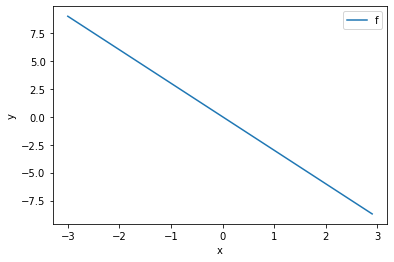

In [4]:
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
# add some noise to f(X)

Y = f + 0.1 * torch.randn(X.size())

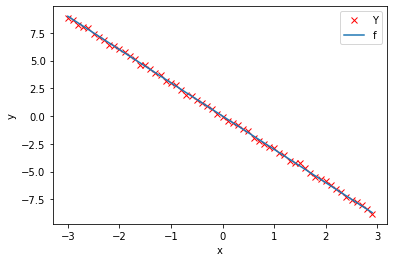

In [6]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
# create the model and loss function
# create forward function for prediction
def forward(x):
    return w*x

In [8]:
# create mse unction to evaluate result

def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

In [9]:
# create learning rate and empty list to record loss for each iteration

lr = 0.1
LOSS = []

In [10]:
w = torch.tensor(-10.0, requires_grad = True)

In [11]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

In [14]:
# def a function to train the model

def train_model(iter):
    for epoch in range(iter):
        
        # make the prediction
        Yhat = forward(X)
        
        # calculate iterartion
        loss = criterion(Yhat, Y)
        
        # plot the diagram
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss
        LOSS.append(loss.item())
        
        # backward
        loss.backward()
        
        # update the parameters
        w.data = w.data - lr*w.grad.data
        
        # zero the gradients
        w.grad.data.zero_()

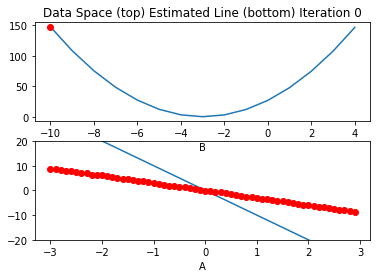

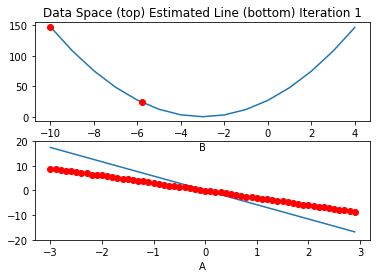

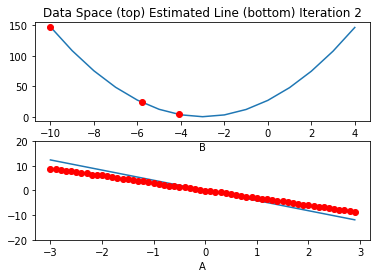

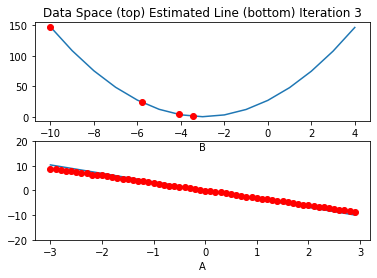

<Figure size 432x288 with 0 Axes>

In [15]:
train_model(4)

Text(0, 0.5, 'Cost')

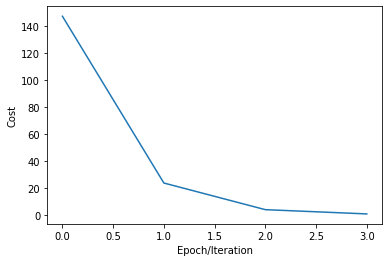

In [16]:
# plot the loss for each iterations

plt.plot(LOSS)
plt.tight_layout
plt.xlabel('Epoch/Iteration')
plt.ylabel('Cost')

In [17]:
w = torch.tensor(-15.0, requires_grad = True)

In [18]:
LOSS2 = []

In [19]:
gradient_plot1 = plot_diagram(X, Y, w, stop=15)

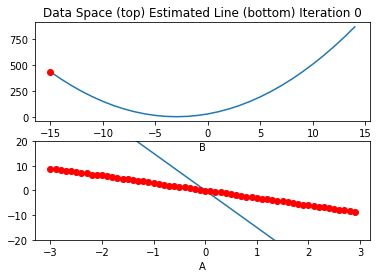

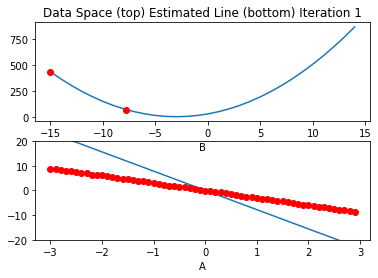

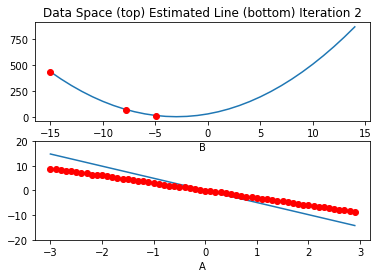

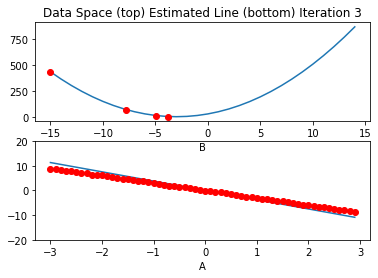

<Figure size 432x288 with 0 Axes>

In [20]:
def my_train_model(iter):
    for epoch in range (iter):
        Yhat = forward(X)
        loss = criterion(Yhat,Y)
        gradient_plot1(Yhat, w, loss.item(), epoch)
        LOSS2.append(loss)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()
my_train_model(4)

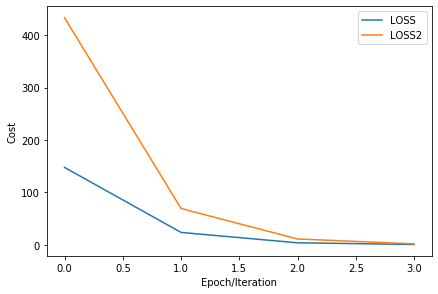

In [22]:
# plot LOSS and LOSS2

plt.plot(LOSS, label = 'LOSS')
plt.plot(LOSS2, label = 'LOSS2')
plt.tight_layout()
plt.xlabel('Epoch/Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()